# Sympy for Quantum Mechanics

Using `help(**desired function**)`, replacing `**desired function**` with what you want to check, `sympy` will give you an explantion of how to use it and what modifiers can be added.

In [2]:
from sympy import *
init_printing()

## Symbolic Variables

In [3]:
x = Symbol("x")

In [4]:
(pi+x)**2

In [6]:
a,b,c = symbols("a, b, c")

In [7]:
type(a)

sympy.core.symbol.Symbol

In [8]:
x = Symbol("x", real=True)

In [9]:
x.is_imaginary

False

In [10]:
x = Symbol("x", positive=True)

In [11]:
x>0

### Complex variables

$\sqrt{-1}$ is `I` 

In [14]:
1+1*I

In [15]:
I**2

In [16]:
(x*I+1)**2

### Rational numbers

There are 3 different numerical types in base sympy. `Real`, `Rational` and `Integer`

In [18]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [19]:
r1

In [20]:
r1+r2

In [21]:
r1/r2

## Numerical Evaluation

In [22]:
pi.evalf(n=50)

In [23]:
y = (x + pi)**2

In [27]:
display( N(y, 5) )
display( y.evalf(n=5) )

In [28]:
y.subs(x, 1.5)

In [29]:
N(y.subs(x, 1.5))

In [30]:
y.subs(x, a+pi)

`lambdify` we can make computing numerical evaluations faster

In [42]:
f = lambdify([x], (x + pi)**2, 'numpy')

In [43]:
y_vec = f(x_vec)

## Algebratic Manipulation

### Expand and Factor

In [48]:
(x+1)*(x+2)*(x+3)

In [49]:
expand((x+1)*(x+2)*(x+3))

In [50]:
sin(a+b)

In [51]:
expand(sin(a+b), trig=True)

In [52]:
help(expand)

Help on function expand in module sympy.core.function:

expand(e, deep=True, modulus=None, power_base=True, power_exp=True, mul=True, log=True, multinomial=True, basic=True, **hints)
    Expand an expression using methods given as hints.
    
    Hints evaluated unless explicitly set to False are:  ``basic``, ``log``,
    ``multinomial``, ``mul``, ``power_base``, and ``power_exp`` The following
    hints are supported but not applied unless set to True:  ``complex``,
    ``func``, and ``trig``.  In addition, the following meta-hints are
    supported by some or all of the other hints:  ``frac``, ``numer``,
    ``denom``, ``modulus``, and ``force``.  ``deep`` is supported by all
    hints.  Additionally, subclasses of Expr may define their own hints or
    meta-hints.
    
    The ``basic`` hint is used for any special rewriting of an object that
    should be done automatically (along with the other hints like ``mul``)
    when expand is called. This is a catch-all hint to handle any s

### Simplify

In [54]:
simplify((x+1)*(x+2)*(x+3))

In [55]:
simplify(sin(a)**2 + cos(a)**2)

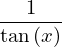

In [56]:
simplify(cos(x)/sin(x))

### `apart` and `together`

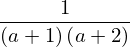

In [63]:
f1 = 1/((a+1)*(a+2))
f1

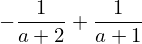

In [59]:
apart(f1)

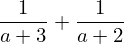

In [61]:
f2 = 1/(a+2) + 1/(a+3)
f2

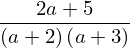

In [64]:
together(f2)

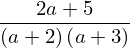

In [65]:
simplify(f2)

## Calculus

In [66]:
y

### Differentiation

In [68]:
diff(y**2, x)

In [69]:
diff(y**2, x, x)

In [77]:
diff(y**2, x, x, x)

For multivariate expressions

In [73]:
x, y, z = symbols("x,y,z")

In [74]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [75]:
diff(f, x, 1, y, 2)

### Integration

In [78]:
f

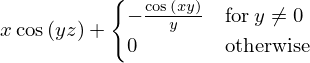

In [80]:
integrate(f, x)

In [81]:
integrate(f, (x, -1, 1))

`oo` is the symbol for infinity ($\infty$)

In [82]:
integrate(exp(-x**2), (x, -oo, oo))

### Sums and Products

In [83]:
n = Symbol("n")

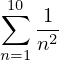

In [84]:
Sum(1/n**2, (n, 1, 10))

In [85]:
Sum(1/n**2, (n,1, 10)).evalf()

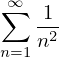

In [86]:
Sum(1/n**2, (n, 1, oo))

In [87]:
Sum(1/n**2, (n, 1, oo)).evalf()

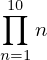

In [88]:
Product(n, (n, 1, 10))

## Limits

In [95]:
limit(sin(x)/x, x, 0)

In [97]:
limit(1/x, x, 0, dir="+")

In [98]:
limit(1/x, x, 0, dir="-")

## Series

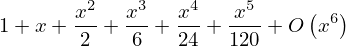

In [99]:
series(exp(x), x)

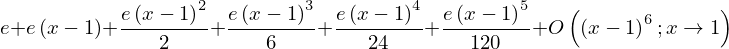

In [100]:
series(exp(x), x, 1)

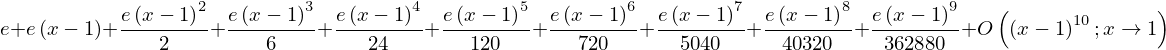

In [101]:
series(exp(x), x, 1, 10)

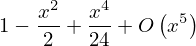

In [115]:
s1 = cos(x).series(x, 0, 5)
s1

In [116]:
s2 = sin(x).series(x, 0, 2)
s2

In [117]:
expand(s1 * s2)

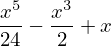

In [118]:
expand(s1.removeO() * s2.removeO())  # Note this is not the correct expansion to the 5th term

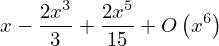

In [119]:
(cos(x)*sin(x)).series(x, 0, 6)

## Linear Algebra

### Matricies

In [121]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

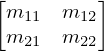

In [122]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [123]:
b = Matrix([[b1], [b2]])
b

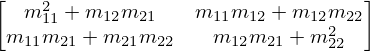

In [124]:
A**2

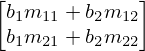

In [125]:
A*b

In [126]:
A.det()

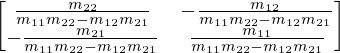

In [129]:
A.inv()

## Solving equations

In [130]:
solve(x**2-1,x)

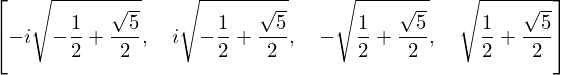

In [131]:
solve(x**4 - x**2 - 1, x)

In [132]:
solve([x + y - 1, x - y - 1], [x,y])

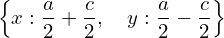

In [133]:
solve([x + y - a, x - y - c], [x,y])

# Quantum Mechanics

In [134]:
from sympy.physics.quantum import *

## States

In [135]:
Ket("psi")

In [136]:
Bra("psi")

In [137]:
u = Ket('0')
d = Ket('1')

a, b = symbols('alpha beta', complex=True)

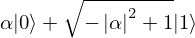

In [145]:
phi = a * u + sqrt(1-abs(a)**2) * d
phi

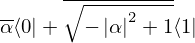

In [146]:
Dagger(phi)

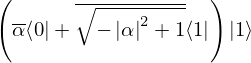

In [148]:
Dagger(phi)*d

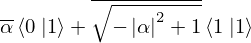

In [149]:
qapply(Dagger(phi)*d)

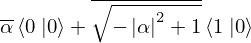

In [150]:
qapply(Dagger(phi) * u)

In [152]:
A = Operator("A")
B = Operator("B")

In [153]:
A * B == B * A

False

In [154]:
expand((A+B)**3)

In [155]:
c = Commutator(A,B)
c

In [156]:
c.doit()

In [159]:
display(a)
display(b)

In [157]:
c = Commutator(a * A, b * B)
c

In [160]:
c = Commutator(A+B, A*B)
c.expand(commutator=True)

In [161]:
Dagger(Commutator(A, B))

In [162]:
ac = AntiCommutator(A,B)

In [163]:
ac.doit()

### Qudrature commutator

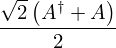

In [164]:
X = (A + Dagger(A))/sqrt(2)
X

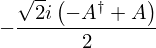

In [165]:
P = -I * (A - Dagger(A))/sqrt(2)
P

In [166]:
Commutator(X, P).expand(commutator=True).expand(commutator=True)